Epoch 1/200
251/251 - 1s - loss: 2878.0554 - mae: 2878.0554 - val_loss: 1595.3170 - val_mae: 1595.3170 - 1s/epoch - 5ms/step
Epoch 2/200
251/251 - 0s - loss: 976.4885 - mae: 976.4885 - val_loss: 1252.3000 - val_mae: 1252.3000 - 366ms/epoch - 1ms/step
Epoch 3/200
251/251 - 0s - loss: 1455.4623 - mae: 1455.4623 - val_loss: 996.7350 - val_mae: 996.7350 - 361ms/epoch - 1ms/step
Epoch 4/200
251/251 - 0s - loss: 1207.4188 - mae: 1207.4188 - val_loss: 1181.8138 - val_mae: 1181.8138 - 359ms/epoch - 1ms/step
Epoch 5/200
251/251 - 0s - loss: 985.6926 - mae: 985.6926 - val_loss: 1053.9518 - val_mae: 1053.9518 - 374ms/epoch - 1ms/step
Epoch 6/200
251/251 - 0s - loss: 976.8349 - mae: 976.8349 - val_loss: 2235.3037 - val_mae: 2235.3037 - 358ms/epoch - 1ms/step
Epoch 7/200
251/251 - 0s - loss: 963.2588 - mae: 963.2588 - val_loss: 1382.0809 - val_mae: 1382.0809 - 365ms/epoch - 1ms/step
Epoch 8/200
251/251 - 0s - loss: 1017.5710 - mae: 1017.5710 - val_loss: 987.5203 - val_mae: 987.5203 - 359ms/epoch - 

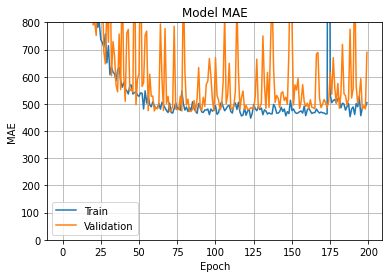

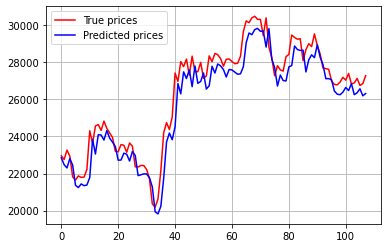

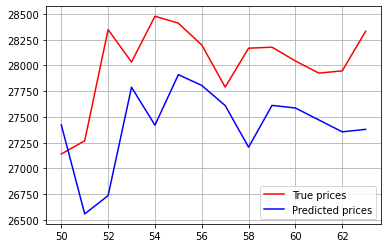

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Coindesk 데이터 파일 읽기
f = open("BTC-USD.csv", "r")
coindesk_data = pd.read_csv(f, header=0)

# 시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq, window_size, horizon):
    X = []
    Y = []
    for i in range(len(seq) - window_size - horizon + 1):
        x = seq[i:i+window_size]
        y = seq[i+window_size+horizon-1]
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

# 데이터 전처리
window_size = 7  # 윈도우 크기
horizon = 1  # 수평선 계수

seq = coindesk_data[["Close"]].to_numpy()
X, Y = seq2dataset(seq, window_size, horizon)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# 데이터 분할
split = int(len(X) * 0.7)
x_train = X[:split]
y_train = Y[:split]
x_test = X[split:]
y_test = Y[split:]

# LSTM 모델 구성 및 학습
model = Sequential()
model.add(LSTM(units=128, activation='relu', input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
hist = model.fit(x_train, y_train, epochs=200, batch_size=1, validation_data=(x_test, y_test), verbose=2)

# 모델 평가
ev = model.evaluate(x_test, y_test, verbose=0)
print("손실 함수:", ev[0], "MAE:", ev[1])

# 예측 결과
pred = model.predict(x_test)
mape = (abs(y_test - pred) / y_test).mean() * 100
print("평균절댓값백분율오차(MAPE):", mape)

# 학습 과정 시각화
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.ylim([0, 800])
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

# 예측 결과 시각화
x_range = range(len(y_test))
plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range, pred[x_range], color='blue')
plt.legend(['True prices', 'Predicted prices'], loc='best')
plt.grid()
plt.show()

# 특정 구간의 예측 결과 시각화
x_range = range(50, 64)
plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range, pred[x_range], color='blue')
plt.legend(['True prices', 'Predicted prices'], loc='best')
plt.grid()
plt.show()